In [30]:
import numpy as np
import matplotlib.pyplot as plt
from time import time
from numba import njit
from matplotlib import colors
import seaborn as sns
from scipy.special import iv
plt.style.use("seaborn-bright")
from numpy.random import random as rng
from numpy import sqrt, pi, exp, log, sin, cos, arange, linspace
from mpl_toolkits.mplot3d import Axes3D
from scipy.signal import correlate, correlation_lags
plt.rcParams["lines.markerfacecolor"] = "none"
plt.rcParams['axes.xmargin'] = 0.01
plt.rcParams['axes.ymargin'] = 0.01
from matplotlib.pyplot import xlabel, ylabel, savefig, show, tight_layout, title, plot, scatter
from matplotlib.pyplot import hist, loglog, semilogy, semilogx, plot, show, legend, axhline
from matplotlib.pyplot import xlim, ylim, gca, text, figure, subplots
from mpl_toolkits.mplot3d import Axes3D
from numpy import vectorize, loadtxt, zeros
import pandas as pd

def moving_average(m, x):
    n = arange(m)
    w = sin(pi*n/m)
    A = 2*m/pi
    return np.convolve(x, w/A, mode='same')

In [153]:
D = 0.1
N = 121
dt = 0.00001
sample_step = 1000
Ncs = arange(2, 20)**2
L = 20
T = 1
V = L*L

In [159]:
#folder = r"C:\\Users\\andriy\\Desktop\\monomers\\data\\N\\" + str(N) + "\\samples\\1\\"
folder = r"C:\\Users\\andriy\\Desktop\\monomers\\"
fname = folder + r"props.txt"
t, u, p, msd, sxy, f2tdu2 = loadtxt(fname, delimiter="\t", skiprows=1, unpack=True)

Text(0.5, 0, '$t D / \\sigma^2$')

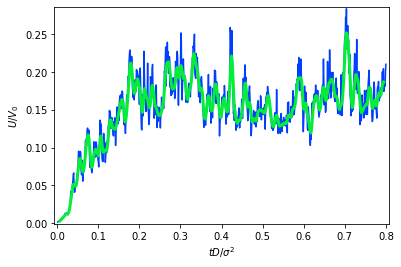

In [160]:
s = 1

plot(t[::s]*D, u[::s], "-")

n = 10
ma = moving_average(n, u)
st = n//2
fn = -n//2
plot(t[st:fn]*D, ma[st:fn], "-", lw=3)

ylabel(r"$U/V_0$")
xlabel(r"$t D / \sigma^2$")
#savefig("u.jpg", bbox_inches="tight", dpi=200)

Text(0.5, 0, '$t D / \\sigma^2$')

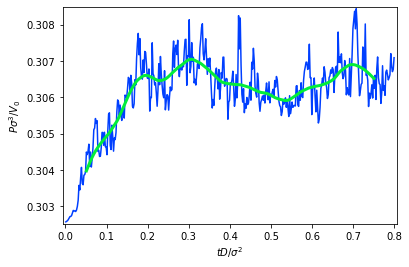

In [161]:
s = 2
plot(t[::s]*D, p[::s], "-")
n = 100
ma = moving_average(n, x=p)
st = n//2
en = -n//2
plot(t[st:en]*D, ma[st:en], lw=3)

ylabel(r"$P \sigma^3 / V_0$")
xlabel(r"$t D / \sigma^2$")
#savefig("p.jpg", bbox_inches="tight", dpi=200)

[]

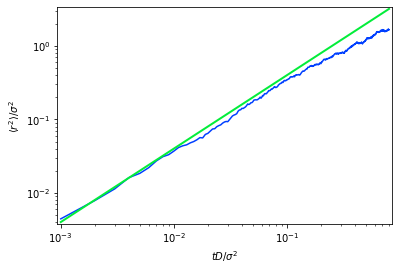

In [162]:
plot(t*D, msd, "-")

n = 2
MSD = 2*n*D*t
plot(t*D, MSD, "-", lw=2)

ylabel(r"$ \langle r^2 \rangle / \sigma^2  $")
xlabel(r"$t D / \sigma^2 $")

loglog()

Text(0, 0.5, '$ \\langle F^2 \\rangle - T \\langle \\frac{\\partial^2 U}{\\partial r^2} \\rangle  $')

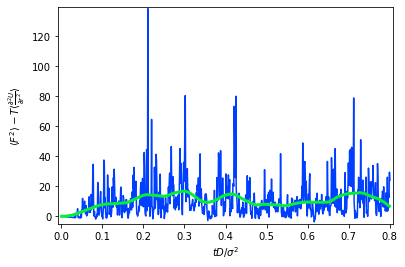

In [173]:
sk = 1
plot(t[::sk]*D, f2tdu2[::sk], "-")

n = 100
ma = moving_average(n, x=f2tdu2)
st = 0
en = -1
plot(t[st:en]*D, ma[st:en], lw=3)

xlabel(r"$t D / \sigma^2 $")
ylabel(
    r"$ \langle F^2 \rangle - T \langle \frac{\partial^2 U}{\partial r^2} \rangle  $")

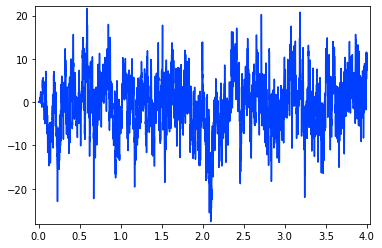

In [85]:
plot(t*D, sxy)

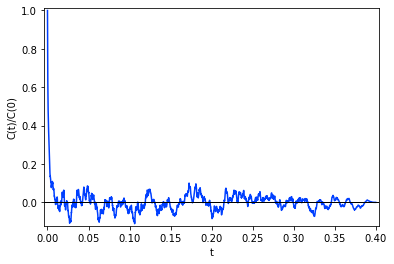

In [271]:
# TODO average over starting times cass 2007

mode = "full"

sel = t>0

c = correlate(sxy[sel], sxy[sel], mode=mode)
size = sxy[sel].size
l = correlation_lags(size, size, mode=mode)

c0 = c[l==0][0]

tau = l * (dt*sample_step) * D

cn = c/c0

sel1 = np.logical_and(tau>=0, tau<1)

plot(tau[sel1], cn[sel1], "-")

ylabel(r"C(t)/C(0)")
xlabel(r"t")

axhline(0, c="k", ls="-", lw=1)

ax = gca()
ax.set_xmargin(0.01)
ax.set_ymargin(0.01)

In [272]:
tex = zeros(len(Ncs))

i = 0
for Nc in Ncs:
    folder = r"C:\\Users\\andriy\\Desktop\\monomers\\data\\N\\" + str(Nc) + "\\samples\\1\\"
    fname = folder + r"time.txt"
    f = open(fname, "r")
    tex[i] = int(f.readline())
    f.close()
    i += 1

[]

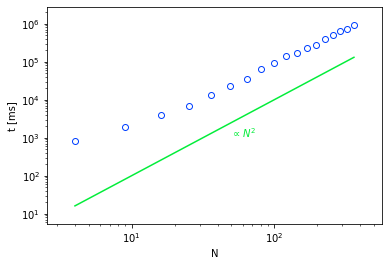

In [273]:
plot(Ncs, tex, "o")
ax = gca()
ax.set_xmargin(0.1)
ax.set_ymargin(0.1)
xlabel("N")
ylabel("t [ms]")

plot(Ncs, Ncs**2)

plt.text(50, 1000, r"$\propto N^2$", color="C1")

loglog()

#savefig("allpairs.jpg", bbox_inches="tight", dpi=200)

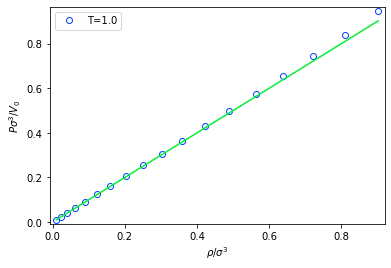

In [152]:
arr_p = zeros(len(Ncs))
figure()
i = 0
for N in Ncs:
    folder = r"C:\\Users\\andriy\\Desktop\\monomers\\data\\N\\" + str(N) + "\\samples\\1\\"
    fname = folder + r"props.txt"
    t, u, p, *_ = loadtxt(fname, delimiter="\t", skiprows=1, unpack=True)
    arr_p[i] = p[-1]
    i += 1
plot(Ncs/V, arr_p, "o", label="T=1.0")
plot(Ncs/V, T*Ncs/V)
ax = gca()
ax.set_xmargin(0.02)
ax.set_ymargin(0.02)
xlabel(r"$\rho / \sigma^3$")
ylabel(r"$P \sigma^3 / V_0$")
legend()
#savefig("ideal_gas.jpg", bbox_inches="tight", dpi=200)

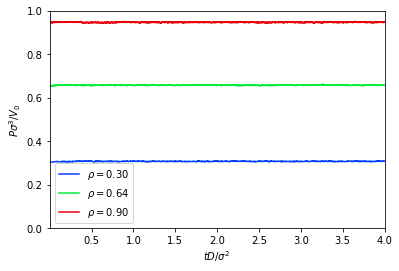

In [153]:
figure()
i = 0
for N in [121, 256, 361]:
    folder = r"C:\\Users\\andriy\\Desktop\\monomers\\data\\N\\" + str(N) + "\\samples\\1\\"
    fname = folder + r"props.txt"
    t, u, p, *_ = loadtxt(fname, delimiter="\t", skiprows=1, unpack=True)
    plot(t*D, p, label=r"$\rho=${:.2f}".format(N/V))
    i += 1
ax = gca()
ax.set_xmargin(0)
ax.set_ymargin(0.1)
xlabel(r"$t D / \sigma^2$")
ylabel(r"$P \sigma^3 / V_0$")
ylim(0, 1)
legend()
#savefig("p_vs_rho.jpg", bbox_inches="tight", dpi=200)

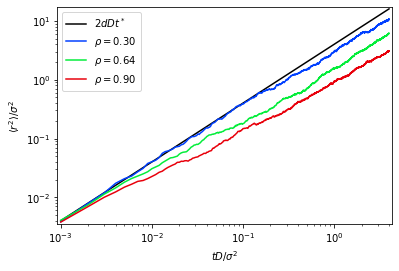

In [247]:
figure()

n = 2
MSD = 2*n*D*t
plot(t*D, MSD, "-", c="k", label=r"$2dDt^*$")

i = 0
for N in [121, 256, 361]:
    folder = r"C:\\Users\\andriy\\Desktop\\monomers\\data\\N\\" + str(N) + "\\samples\\1\\"
    fname = folder + r"props.txt"
    t, u, p, msd, sxy = loadtxt(fname, delimiter="\t", skiprows=1, unpack=True)
    s = 1
    plot(t[::s]*D, msd[::s], "-", label=r"$\rho=${:.2f}".format(N/V))
    i += 1

ylabel(r"$ \langle r^2 \rangle / \sigma^2  $")
xlabel(r"$t D / \sigma^2 $")

legend()
loglog()
#savefig("msd_rho.jpg", bbox_inches="tight", dpi=200)

In [66]:
121/(20*20)

0.3025

In [68]:
10**5 / 1000 / 60 

1.6666666666666667